Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


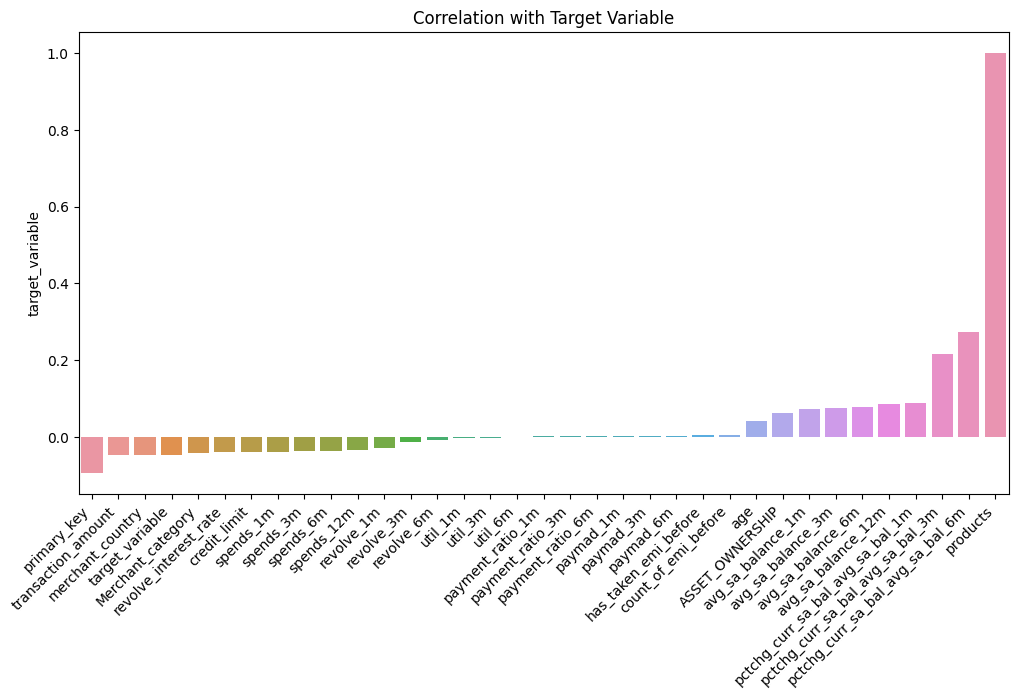

Logistic Regression Accuracy on Original Data: 0.9467272727272728
Confusion Matrix:
[[15621     0]
 [  879     0]]
SVM Classifier Accuracy on Original Data: 0.9467272727272728
1    2620
0    2620
Name: target_variable, dtype: int64
Logistic Regression Accuracy on Undersampled Data: 0.9549132947976878
Confusion Matrix:
[[1652    1]
 [  77    0]]
SVM Classifier Accuracy on Undersampled Data: 0.9554913294797688


In [16]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Mount Google Drive
drive.mount('/content/drive')

# Load data from Google Drive
data = pd.read_csv('/content/drive/MyDrive/case_study_devdata.csv')

# Data Processing
data.drop(data.iloc[:, 8:288], axis=1, inplace=True)
data = data.fillna(0)

# Mapping categorical values to numerical values
data['Merchant_category'] = data['Merchant_category'].map({
    'Hotels': 1, 'Fuel': 2, 'Retail': 3, 'Dept stores': 4, 'Rent Payments': 5,
    'Utility': 6, 'Wallet load': 7, 'Railways': 8, 'Insurance': 9, 'Medical': 10,
    'Cloth stores': 11, 'Education': 12, 'Govt services': 13, 'Home furnishing': 14,
    'Misc Services': 15, 'Electronics': 16, 'Restaurants': 17, 'Business Services': 18,
    'Transportation services': 19, 'Professional services & memberships': 20,
    'Contracted services': 21, 'Food': 22, 'Digital goods': 23, 'Airline': 24,
    'Direct marketing': 25, 'Books & stationery': 26, 'Auto': 27, 'Alcohol': 28,
    'Music stores': 29, 'Quasi cash': 30, 'Airports': 31
})

data['merchant_country'] = data['merchant_country'].map({
    'IN': 1, 'HK': 2, 'SG': 3, 'NL': 4, 'GB': 5, 'CH': 6, 'SA': 7, 'DE': 8, 'US': 9, 'LK': 10, 'PL': 11,
    'AE': 12, 'CA': 13, 'TH': 14, 'LU': 15, 'IE': 16, 'SE': 17, 'OM': 18, 'AU': 19, 'CZ': 20, 'FR': 21, 'NG': 22,
    'GH': 23, 'KZ': 24, 'VN': 25, 'AT': 26, 'CY': 27, 'BD': 28, 'CR': 29, 'MV': 30, 'AZ': 31, 'JO': 32, 'GI': 33,
    'QA': 34, 'FI': 35, 'IT': 36, 'MY': 37, 'LB': 38, 'TR': 39, 'GR': 40, 'MU': 41, 'MA': 42, 'ES': 43, 'RO': 44,
    'NP': 45, 'EG': 46, 'MT': 47, 'ID': 48, 'BR': 49, 'IL': 50, 'BH': 51, 'EE': 52, 'TZ': 53, 'PH': 54, 'ZA': 56,
    'AD': 57, 'IS': 58, 'KE': 59, 'DK': 60, 'NZ': 61, 'HU': 62, 'PA': 63, 'LT': 64, 'JP': 65, 'BS': 66, 'SC': 67
})

data['products'] = data['products'].map({
    'Affluent_Card': 1, 'Mass_Card': 2, 'Youth_Card': 3, 'HNI_Card': 4
})

data.drop(["merchant_name", "married_flag"], axis=1, inplace=True)
data.drop(['Bureau_AL_amt_ever', 'Bureau_BL_amt_ever', 'Bureau_CCOD_amt_ever',
           'Bureau_CV_amt_ever', 'Bureau_CD_amt_ever', 'Bureau_EL_amt_ever',
           'Bureau_GL_amt_ever', 'Bureau_HL_amt_ever', 'Bureau_PL_amt_ever',
           'Bureau_LAP_amt_ever', 'Bureau_TW_amt_ever', 'Bureau_UC_amt_ever',
           'Bureau_unsec_amt_ever', 'Bureau_sec_amt_ever', 'Bureau_all_amt_ever',
           'Bureau_AL_amt_live', 'Bureau_BL_amt_live', 'Bureau_CCOD_amt_live',
           'Bureau_CV_amt_live', 'Bureau_CD_amt_live', 'Bureau_EL_amt_live',
           'Bureau_GL_amt_live', 'Bureau_HL_amt_live', 'Bureau_PL_amt_live',
           'Bureau_LAP_amt_live', 'Bureau_TW_amt_live', 'Bureau_UC_amt_live',
           'Bureau_unsec_amt_live', 'Bureau_sec_amt_live', 'Bureau_all_amt_live'], axis=1, inplace=True)


# Show correlation plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=data.columns, y=data.corr()['target_variable'].sort_values())
plt.title("Correlation with Target Variable")
plt.xticks(rotation=45, ha="right")
plt.show()
#products shows high correlation
data.drop('products', axis=1, inplace=True)
# Feature Scaling
scaler = StandardScaler()
model = scaler.fit(data.drop(['target_variable', 'primary_key'], axis=1))
scaled_data = model.transform(data.drop(['target_variable', 'primary_key'], axis=1))

# PCA for dimensionality reduction on the original data
pca = PCA(n_components=3)
pca.fit(scaled_data)
df_pca = pca.transform(scaled_data)
df_pca = pd.DataFrame(df_pca, columns=['P1', 'P2', 'P3'])

# Modeling on original data
y = data['target_variable']

# Logistic Regression on original data
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.33, random_state=101)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print(f"Logistic Regression Accuracy on Original Data: {accuracy_log}")
print(f"Confusion Matrix:\n{conf_matrix_log}")

# Support Vector Machine (SVM) on original data
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy on Original Data: {accuracy_svm}")

# Undersampling
class_count_0, class_count_1 = data['target_variable'].value_counts()
class_0 = data[data['target_variable'] == 0]
class_1 = data[data['target_variable'] == 1]
class_0_undersampled = class_0.sample(class_count_1, random_state=42)
undersampled_data = pd.concat([class_0_undersampled, class_1], axis=0).sample(frac=1, random_state=42)
X_resampled = undersampled_data.drop('target_variable', axis=1)
y_resampled = undersampled_data['target_variable']

# Check and handle NaN values in the target variable
if y_resampled.isnull().any():
    y_resampled = y_resampled.fillna(0)  # Replace NaN with a suitable value (0 in this case)

print(pd.Series(y_resampled).value_counts())

# Feature Scaling for undersampled data
model2 = scaler.fit(X_resampled.drop(['primary_key'], axis=1))
scaled_data2 = model2.transform(X_resampled.drop(['primary_key'], axis=1))

# PCA for dimensionality reduction on undersampled data
pca2 = PCA(n_components=7)
pca2.fit(scaled_data2)
df_pca2 = pca2.transform(scaled_data2)
df_pca2 = pd.DataFrame(df_pca2, columns=['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'])
df_pca2['target_variable'] = y_resampled
df_pca2['primary_key'] = X_resampled['primary_key']
# Check and handle NaN values in the undersampled data after PCA
df_pca2 = df_pca2.fillna(0)  # Replace NaN with a suitable value (0 in this case)
# Split undersampled data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_pca2.drop(['target_variable', 'primary_key'], axis=1),
                                                        df_pca2['target_variable'], test_size=0.33, random_state=101)

# Check and handle NaN values in the training set
if y_train2.isnull().any():
    y_train2 = y_train2.fillna(0)  # Replace NaN with a suitable value (0 in this case)

# Logistic Regression on undersampled data
log_model2 = LogisticRegression()
log_model2.fit(X_train2, y_train2)
y_pred2_log = log_model2.predict(X_test2)
accuracy2_log = accuracy_score(y_test2, y_pred2_log)
conf_matrix2_log = confusion_matrix(y_test2, y_pred2_log)
print(f"Logistic Regression Accuracy on Undersampled Data: {accuracy2_log}")
print(f"Confusion Matrix:\n{conf_matrix2_log}")

# Support Vector Machine (SVM) on undersampled data
svm_classifier2 = SVC()
svm_classifier2.fit(X_train2, y_train2)
y_pred2_svm = svm_classifier2.predict(X_test2)
accuracy2_svm = accuracy_score(y_test2, y_pred2_svm)
print(f"SVM Classifier Accuracy on Undersampled Data: {accuracy2_svm}")
